# ИССЛЕДОВАНИЕ ДАННЫХ HR-АГЕНТСТВА



В процессе анализа датасета необходимо:

Выяснить, какие факторы влияют на зарплату специалиста Data Scientist.
А также ответить на ключевые вопросы HR-агентства:
 - Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?
 - Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?
 - Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?
 - Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

Продемонстрировать использование разных тестов для проверки статистической значимости сделанных выводов.

In [127]:
# загружаю библиотеки

import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy import stats
import statsmodels.api as sm
from statsmodels import stats as sms
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce

# делаю визуальную настройку графиков
sns.set_theme("notebook") 
sns.set_palette("Set2") 

Классифицирую признаки:

Unnamed: 0 - числовой
work_year - числовой
experience_level - категориальный
employment_type - категориальный
job_title - категориальный
salary - числовой
salary_currency - категориальный
salary_in_usd - числовой
employee_residence - категориальный
remote_ratio - категориальный (хотя и состоит из цифр)
company_location - категориальный
company_size - категориальный

In [128]:
# загружаю датасет
salaries = pd.read_csv('ds_salaries.csv')
salaries

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [129]:
# задаю уровень значимости

alpha = 0.05

# Описательный анализ данных

In [130]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


В датасете 607 записей, без пропущенных значений


### Классифицирую признаки:

Unnamed: 0 - числовой

work_year - числовой

experience_level - категориальный

employment_type - категориальный

job_title - категориальный

salary - числовой

salary_currency - категориальный

salary_in_usd - числовой

employee_residence - категориальный

remote_ratio - категориальный (хотя и состоит из цифр)

company_location - категориальный

company_size - категориальный

In [131]:
# проверяю на наличие дубликатов

print('Количество дубликатов: {}'.format(salaries[salaries.duplicated()].shape[0]))

Количество дубликатов: 0


Исследовав признаки датасетапришла к выводу о неинформативности столбцов Unnamed: 0, salary и salary_currency, так как в данных имеется признак salary_in_usd, на основе которого я и буду производить свой анализ. 

По сути мне и необходимо, чтобы зарплата была приведена в одну валюту, чтобы можно было проводить сравнительные исследования. На основании этого я избавлюсь от признаков Unnamed: 0,salary и salary_currency.

In [107]:
# удаляю не информативные признаки

salaries = salaries.drop(['salary_currency', 'salary', 'Unnamed: 0'] , axis=1)


[Text(0.5, 0, 'Зарплата в долларах'), Text(0, 0.5, 'Частота')]

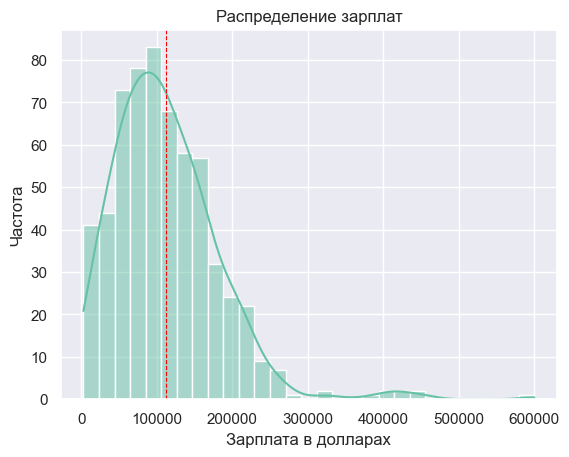

In [132]:
# строю гистограмму распределения зарплат

salary_hist = sns.histplot(salaries['salary_in_usd'], kde = True)
salary_hist.axvline(salaries['salary_in_usd'].mean(), color='red', linestyle='--', linewidth=0.8)
salary_hist.set_title('Распределение зарплат')
salary_hist.set(xlabel = 'Зарплата в долларах', ylabel= 'Частота')

[Text(0.5, 0, 'Зарплата в долларах')]

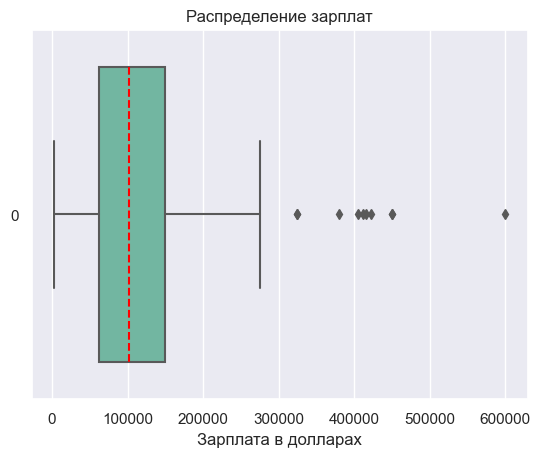

In [133]:
#строю коробчатую диаграмму распределения зарплат

salary_box = sns.boxplot(salaries['salary_in_usd'], orient='h', medianprops={"color": "red", "linestyle": '--'})
salary_box.set_title('Распределение зарплат')
salary_box.set(xlabel = 'Зарплата в долларах')

In [134]:
# отображаю основные статистические характеристики данных о зарплате

salaries['salary_in_usd'].describe().round()

count       607.0
mean     112298.0
std       70957.0
min        2859.0
25%       62726.0
50%      101570.0
75%      150000.0
max      600000.0
Name: salary_in_usd, dtype: float64

Итак, данные о зарплате в долларах имеют распределение отличное от нормального.

Среднее значение 112298
Медиана - 101570
Минимум - 2859, максимум - 600000

В данных имеются выбросы.

In [135]:
#рассмотрю стат х-ки ещё нескольких мне интересных признаков

salaries['job_title'].describe()

count                607
unique                50
top       Data Scientist
freq                 143
Name: job_title, dtype: object

В признаке профессий имеется 50 различных значений, самое часто встречающееся - Data Scientist

In [136]:
salaries['company_location'].describe()

count     607
unique     50
top        US
freq      355
Name: company_location, dtype: object

In [137]:
salaries['experience_level'].describe()

count     607
unique      4
top        SE
freq      280
Name: experience_level, dtype: object


### Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?

Text(0.5, 1.0, 'Распределение ЗП Data Scientist по годам')

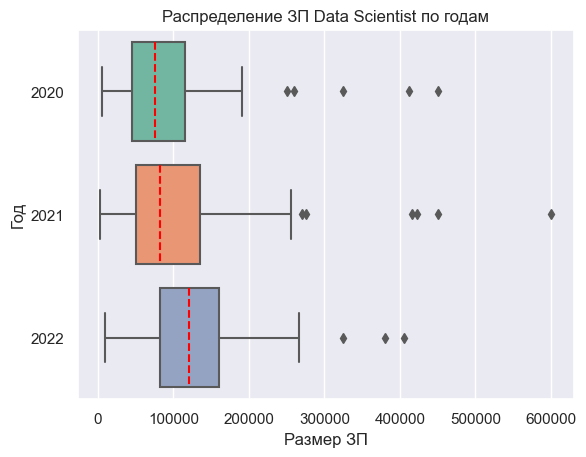

In [138]:
# построю диаграмму распределения зарплат (в долларах) по годам
# уточнение - под "специалистами Data Scientist", я подразумеваю весь датасет, тк в задании не указано, что имеется в виду конкретная должность.

salary_year = sns.boxplot(data = salaries, x ='salary_in_usd', y = 'work_year', orient='h', medianprops={"color": "red", "linestyle": '--'})
salary_year.set(xlabel='Размер ЗП', ylabel='Год')
plt.title('Распределение ЗП Data Scientist по годам')

In [139]:
# отображаю основные статистические характеристики данных

salary_agg = salaries.groupby('work_year')['salary_in_usd'].describe().round(2)
print('Заработная плата в зависимости от года')
salary_agg

Заработная плата в зависимости от года


,count,mean,std,min,25%,50%,75%,max
work_year,,,,,,,,
2020,72.0,95813.00,82831.80,5707.0,45724.5,75544.0,115526.0,450000.0
2021,217.0,99853.79,80225.11,2859.0,50000.0,82528.0,135000.0,600000.0
2022,318.0,124522.01,58183.65,10000.0,81666.0,120000.0,160000.0,405000.0


Визуально по диаграмме можно предположить, что в зависимости от года заработная плата растёт. 
Медиана каждый последующий год выше, средняя зп тоже выше, но в данных за 21 год имеются кричичные выбросы (особенно выброс в 600000). 
Даже на глаз видно, что динамика 21го года к 20му - не значительная или её вовсе нет.

Будет ли это влиять на мои выводы при ответе на вопрос,я решу после статистического теста. 

А так же, сравню свои выводы на основании визуализации с тестами и пойму, статистически значим ли этот рост зп.



### Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?

,count,mean,std,min,25%,50%,75%,max
job_title,,,,,,,,
Data Engineer,89.0,126375.696629,55954.398677,25000.0,78526.0,120000.0,160000.0,324000.0
Data Scientist,77.0,136172.090909,54563.084740,18442.0,100000.0,140000.0,176000.0,260000.0


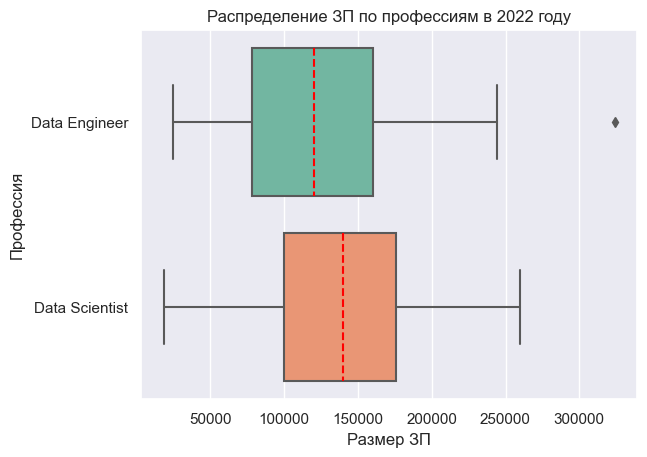

In [140]:
mask = salaries['work_year'] == 2022 # фильтрую по году
salary_2022 = salaries[mask]
prof = ['Data Scientist', 'Data Engineer'] # фильтрую по профессии
salary_prof = salary_2022.loc[salary_2022['job_title'].isin(prof)]

# строю диаграмму
salary_2022_box = sns.boxplot(data = salary_prof, x ='salary_in_usd', y = 'job_title', orient='h', medianprops={"color": "red", "linestyle": '--'})
salary_2022_box.set(xlabel='Размер ЗП', ylabel='Профессия')
plt.title('Распределение ЗП по профессиям в 2022 году')

# отображаю основные статистические характеристики данных о зарплате
salary_agg = salary_prof.groupby('job_title')['salary_in_usd'].describe()
salary_agg

По диаграмме можно сделать вывод, что профессия Data Scientist оплачивалась в 2022 году выше, чем Data Engineer. 
"Усы" диаграмм так же разные, у DS они шире. Сама "коробка" у DS смещена правее, вместе с медианой.

Статистически значима ли эта разница пойму сделав тесты.

### Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?


,count,mean,std,min,25%,50%,75%,max
company_size,,,,,,,,
L,198.0,119243.0,86157.0,5882.0,61042.0,100000.0,154600.0,600000.0
M,326.0,116905.0,59288.0,4000.0,78132.0,113188.0,152875.0,450000.0
S,83.0,77633.0,63462.0,2859.0,41943.0,65000.0,100000.0,416000.0


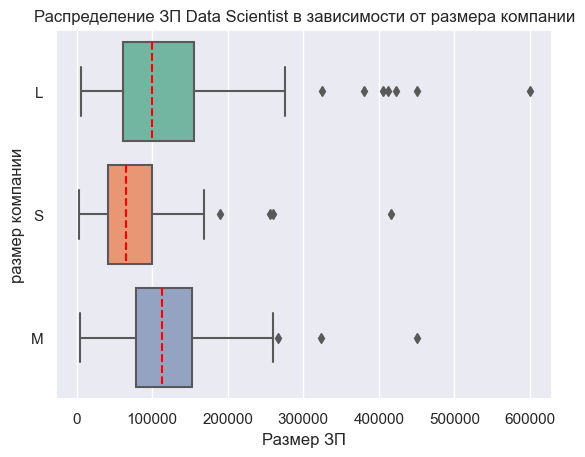

In [141]:
# уточнение - под "специалистами Data Scientist", я подразумеваю весь датасет, тк в задании не указано, что имеется в виду конкретная должность.
# строю диаграмму

salaries_ds_box = sns.boxplot(data = salaries, x = 'salary_in_usd' , y ='company_size',  orient='h', medianprops={"color": "red", "linestyle": '--'})
salaries_ds_box.set(xlabel='Размер ЗП', ylabel='размер компании')
plt.title('Распределение ЗП Data Scientist в зависимости от размера компании')

# отображаю основные статистические характеристики данных о зарплате
salary_agg = salaries.groupby('company_size')['salary_in_usd'].describe().round()
salary_agg

Визуально заработные платы в компаниях размера S - меньше, чем в M и L. Но вот очевидную визуальную разницу между M и L отследить сложнее.

Среднее значение выше у больших компаний, но в их данных имеется очевидный выброс в 600000 долларов.

А вот по медиане можно судить, что в средних компаниях ЗП всё таки немного выше, чем в больших.

Посмотрю, как на эти вопросы ответят тесты.

### Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

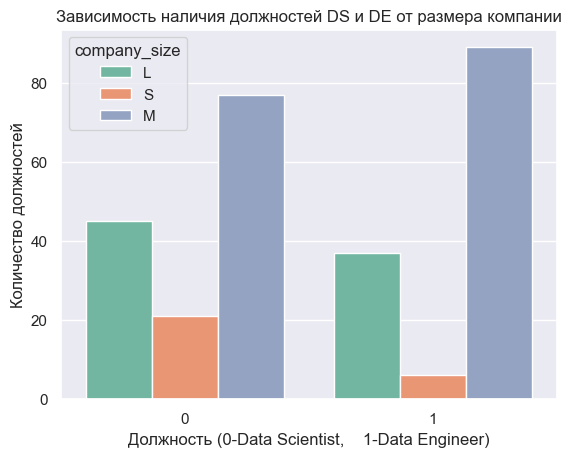

In [142]:
prof2 = ['Data Engineer', 'Data Scientist'] # фильтрую по профессии
salary_prof = salaries.loc[salaries['job_title'].isin(prof2)]

salary_prof = pd.get_dummies(salary_prof, columns=['job_title']) # кодирую признак профессии

# строю график
ax = sns.countplot(data=salary_prof, x=salary_prof['job_title_Data Engineer'], hue='company_size')
ax.set(xlabel='Должность (0-Data Scientist,    1-Data Engineer)', ylabel='Количество должностей')
plt.title('Зависимость наличия должностей DS и DE от размера компании')
plt.show()


Визуально наблюдается прямая связь между размером компании и количеством вакансий соответствующих профессий.

Чем компания больше - тем больше специалистов она ищет. Далее проверю этот вывод тестами.

## Статистический анализ данных


In [143]:
# функция для принятия решения о нормальности
def decision_normality(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Распределение отлично от нормального'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. Распределение является нормальным'.format(alpha))


# функция для принятия решения об отклонении нулевой гипотезы
def decision_hypothesis(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу в пользу альтернативной.'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))
      


### Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?


**Сформулирую нулевую и альтернативные гипотезы** (отдельно для 20-21 года и 21-22 года)

ДЛЯ 2020 и 2021 года:

*Нулевая гипотеза* ($H_0$): зарплата в 2021 году ($μ_1$) статистически меньше либо равна зарплате в 2020 году ($μ_2$).

$$ H_0 : μ_1 <= μ_2$$

*Альтернативная гипотеза* ($H_1$): зарплата в 2021 году ($μ_1$) статистически больше, чем зарплата в 2020 году ($μ_2$).

$$ H_1 : μ_1 > μ_2$$

---------------------------------------------------------------------------------------------------

ДЛЯ 2021 и 2022 года:

*Нулевая гипотеза* ($H_0$): зарплата в 2022 году ($μ_1$) статистически меньше либо равна зарплате в 2021 году ($μ_2$).

$$ H_0 : μ_1 <= μ_2$$

*Альтернативная гипотеза* ($H_1$): зарплата в 2022 году ($μ_1$) статистически больше, чем зарплата в 2021 году ($μ_2$).

$$ H_1 : μ_1 > μ_2$$

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально. Напомним гипотезы теста Шапиро-Уилка:

*Нулевая гипотеза* ($H_0$): распределение данные является нормальным.

*Альтернативная гипотеза* ($H_1$): распределение данных отлично от нормального.

In [144]:

sl_20 = salaries[salaries['work_year']==2020]['salary_in_usd']
sl_21 = salaries.loc[salaries['work_year']==2021]['salary_in_usd']
sl_22 = salaries.loc[salaries['work_year']==2022]['salary_in_usd']

# проводим тест Шапиро-Уилка
print('2020:')
result = stats.shapiro(sl_20)
decision_normality(result[1])

print('2021:')
result = stats.shapiro(sl_21)
decision_normality(result[1])

print('2022:')
result = stats.shapiro(sl_22)
decision_normality(result[1])


2020:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
2021:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
2022:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


**Выберу подходящий статистический тест**

Для выбора нужного теста воспользуюсь алгоритмом выбора теста. Для этого отвечу на следующие вопросы:
* Какой тип у признака «salary_in_usd»? — Количественный.
* Сколько сравниваемых групп? — Две (отдельно 20-21 и 21-22 года).
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет.

Чтобы проверить мою гипотезу, можно использовать U-критерий Манна — Уитни для сравнения распределений на основе рангов.

**Проведу тест**

In [75]:
# сравниваю зп в 2020 и 2021 году
_, p = stats.mannwhitneyu(sl_21, sl_20, alternative='greater')
decision_hypothesis(p)

p-value = 0.232
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


In [76]:
# сравниваю зп в 2020 и 2021 году
_, p = stats.mannwhitneyu(sl_22, sl_21, alternative='greater')
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


На основании тестов делаю вывод, что НЕЛЬЗЯ считать, что заработная плата DS ежегодно показывает динамику.

Динамику показал только 22 год, по сравнению с 21.


### Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?


**Сформулирую нулевую и альтернативные гипотезы**

Сначала проверю равны ли зарплаты:

*Нулевая гипотеза* ($H_0$): зарплата Data Scientist ($μ_1$) и Data Engineer ($μ_2$) в 2022 году равны.

$$ H_0 : μ_1 = μ_2$$

*Альтернативная гипотеза* ($H_1$):зарплата Data Scientist ($μ_1$) и Data Engineer ($μ_2$) в 2022 году не равны.

$$ H_1 : μ_1   \neq   μ_2$$


**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально. Напомним гипотезы теста Шапиро-Уилка:

*Нулевая гипотеза* ($H_0$): распределение данные является нормальным.

*Альтернативная гипотеза* ($H_1$): распределение данных отлично от нормального.

In [68]:
salaries_22 = pd.read_csv('ds_salaries.csv')

mask = salaries_22['work_year'] == 2022 # фильтрую по году
salary_2022 = salaries_22[mask]

ds_22 = salary_2022[salary_2022['job_title'] == 'Data Scientist']['salary_in_usd']
de_22 = salary_2022[salary_2022['job_title'] == 'Data Engineer']['salary_in_usd']

# проводим тест Шапиро-Уилка
print('2020:')
result = stats.shapiro(ds_22)
decision_normality(result[1])

print('2021:')
result = stats.shapiro(de_22)
decision_normality(result[1])

2020:
p-value = 0.327
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
2021:
p-value = 0.010
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


**Выберу подходящий статистический тест**

Для выбора нужного теста воспользуюсь алгоритмом выбора теста. Для этого отвечу на следующие вопросы:
* Какой тип у признака «salary_in_usd»? — Количественный.
* Сколько сравниваемых групп? — Две.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет (в одной группе распределение отлично от нормального).

Чтобы проверить мою гипотезу, можно использовать U-критерий Манна — Уитни для сравнения распределений на основе рангов.

**Проведу тест**

In [70]:
# сравниваю зп в DS и DE d 2022 году
_, p = stats.mannwhitneyu(ds_22, de_22, alternative='two-sided')
decision_hypothesis(p)

p-value = 0.155
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


### Вывод: 
У меня нет оснований утверждать, что есть разница между зарплатами DS и DE в 2022 году. 

### Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?


**Сформулирую нулевую и альтернативные гипотезы**



*Нулевая гипотеза* ($H_0$): зарплата Data Scientist в компаниях S($μ_1$), M($μ_2$) и L($μ_3$) равны.

$$ H_1 : μ_1 = μ_2 = μ_3$$

*Альтернативная гипотеза* зарплата Data Scientist в компаниях S($μ_1$), M($μ_2$) и L($μ_3$) не равны.

$$ H_1 : μ_1 \neq μ_2 \neq μ_3$$

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально. Напомним гипотезы теста Шапиро-Уилка:

*Нулевая гипотеза* ($H_0$): распределение данные является нормальным.

*Альтернативная гипотеза* ($H_1$): распределение данных отлично от нормального.

In [73]:
sl_S = salaries[salaries['company_size']=='S']['salary_in_usd']
sl_M = salaries[salaries['company_size']=='M']['salary_in_usd']
sl_L = salaries[salaries['company_size']=='L']['salary_in_usd']

# проводим тест Шапиро-Уилка
print('2020:')
result = stats.shapiro(sl_S)
decision_normality(result[1])

print('2021:')
result = stats.shapiro(sl_M)
decision_normality(result[1])

print('2022:')
result = stats.shapiro(sl_L)
decision_normality(result[1])


2020:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
2021:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
2022:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


**Выберу подходящий статистический тест**

Для выбора нужного теста воспользуюсь алгоритмом выбора теста. Для этого отвечу на следующие вопросы:
* Какой тип у признака «salary_in_usd»? — Количественный.
* Сколько сравниваемых групп? — Три.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет. 

Для проверки моей гипотезы можно использовать критерий Краскела — Уоллиса.

**Проведу тест**

In [74]:
# провожу тест
_, p = stats.kruskal(sl_S, sl_M, sl_L)
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


ВЫВОД: Заработные платы различны в зависимости от размера компании.

### Проверю, правильно ли моё предположение, что с увеличением размеров компании - увеличивается и зп.

**Сформулирую нулевую и альтернативные гипотезы** (S - M и M - L)

ДЛЯ S и M:

*Нулевая гипотеза* ($H_0$): зарплата в компаниях M ($μ_1$) статистически меньше либо равна зарплате в компаниях S ($μ_2$).

$$ H_0 : μ_1 <= μ_2$$

*Альтернативная гипотеза* ($H_1$): зарплата в компаниях M ($μ_1$) статистически больше, чем зарплата в компаниях S ($μ_2$).

$$ H_1 : μ_1 > μ_2$$

---------------------------------------------------------------------------------------------------

ДЛЯ M и L:

*Нулевая гипотеза* ($H_0$): зарплата в компаниях L ($μ_1$) статистически меньше либо равна зарплате в компаниях M ($μ_2$).

$$ H_0 : μ_1 <= μ_2$$

*Альтернативная гипотеза* ($H_1$): зарплата в компаниях L ($μ_1$) статистически больше, чем зарплата в компаниях M ($μ_2$).

$$ H_1 : μ_1 > μ_2$$

Я уже знаю, что данные в выборках не распределены нормально. Буду сравнивать компании S - M и M - L.

**Выберу подходящий статистический тест**

Для выбора нужного теста воспользуюсь алгоритмом выбора теста. Для этого отвечу на следующие вопросы:
* Какой тип у признака «salary_in_usd»? — Количественный.
* Сколько сравниваемых групп? — Две (отдельно S - M и M - L).
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет.

Чтобы проверить мою гипотезу, можно использовать U-критерий Манна — Уитни для сравнения распределений на основе рангов.

**Проведу тест**

In [77]:
# сравниваю зп в компаниях S и M
_, p = stats.mannwhitneyu(sl_M, sl_S, alternative='greater')
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


In [78]:
# сравниваю зп в компаниях M и L
_, p = stats.mannwhitneyu(sl_L, sl_M, alternative='greater')
decision_hypothesis(p)

p-value = 0.892
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


ВЫВОД:

На основании статистических тестов можно утверждать, что зарплаты в компаниях S и M - отличаются (в компаниях M зп выше). 

Зарплаты в компаниях M и L - статистически не отличаются. Поэтому сказать, что от размера компании доход увеличивается, в целом, нельзя.

Но можно утверждать, что размеры зарплат не одинаковы в компаниях разного размера.

### Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

**Сформулирую нулевую и альтернативные гипотезы**

*Нулевая гипотеза*: между наличием должностей Data Scientist и Data Engineer и размером компании нет взаимосвязи (признаки независимы).

*Альтернативная гипотеза*: между наличием должностей Data Scientist и Data Engineer и размером компании есть взаимосвязь (признаки зависимы).


**Выберу подходящий статистический тест**

Для выбора нужного теста воспользуюсь алгоритмом выбора теста. Для этого отвечу на следующие вопросы:
* Какой тип у признака «job_title»? — Категориальный.
* Сколько сравниваемых групп? — Две.
* Проверяется независимость групп? — Да.

Для проверки нашей гипотезы можно использовать критерий ${\chi}^2$ (хи-квадрат).

**Проведу тест**

In [82]:
# составляю таблицу сопряжённости
prof2 = ['Data Engineer', 'Data Scientist'] # фильтрую по профессии
salary_prof2 = salaries.loc[salaries['job_title'].isin(prof2)]

cross_table = pd.crosstab(salary_prof2['job_title'], salary_prof2['company_size'])

cross_table

company_size,L,M,S
job_title,,,
Data Engineer,37,89,6
Data Scientist,45,77,21


In [83]:
# проводим тест
_, p, _, _ = stats.chi2_contingency(cross_table)
decision_hypothesis(p)

p-value = 0.008
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


ВЫВОД: Наблюдается статистически значимая взаимосвязь между наличием должностей Data Scientist и Data Engineer и размером компании.

# Дополнительное исследование

### Увеличивается ли заработная плата в зависимости от опыта работы? 

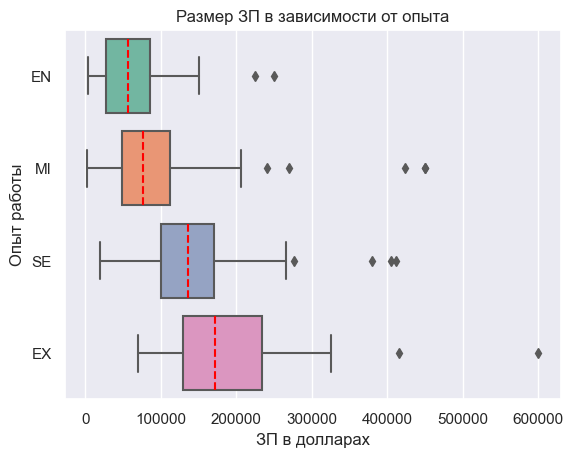

In [117]:
# посторою график зп в зависимости от опыта

experience = sns.boxplot(salaries, x='salary_in_usd', y='experience_level', orient='h', medianprops={"color": "red", "linestyle": '--'}, order=['EN', 'MI', 'SE', 'EX'])
experience.set(xlabel='ЗП в долларах', ylabel='Опыт работы')
plt.title('Размер ЗП в зависимости от опыта')
plt.show()

In [149]:
# отображаю основные статистические характеристики данных о зарплате

salary_exp = salaries.groupby('experience_level')['salary_in_usd'].describe().round(2)
print('Заработная плата в зависимости от опыта')
salary_exp

Заработная плата в зависимости от опыта


,count,mean,std,min,25%,50%,75%,max
experience_level,,,,,,,,
EN,88.0,61643.32,44395.54,4000.0,27505.0,56500.0,85425.75,250000.0
EX,26.0,199392.04,117071.26,69741.0,130006.5,171437.5,233750.00,600000.0
MI,213.0,87996.06,63901.06,2859.0,48000.0,76940.0,112000.00,450000.0
SE,280.0,138617.29,57691.98,18907.0,100000.0,135500.0,170000.00,412000.0


Судя по визуализации на графике и статистическим характеристикам, можно сделать первичный вывод, что в зависимости от опыта заработная плата растёт.

Это прослеживается если анализировать среднюю ЗП, а так же медиану.

Чтобы определить, являются ли эти различия статистически значимыми, проведу тестирование. 

Буду проводить его отдельно для последовательных пар опыта работы.

**Сформулирую нулевую и альтернативные гипотезы** (EN - MI, Mi - SE, SE - EX)

ДЛЯ EN и MI:

*Нулевая гипотеза* ($H_0$): зарплата с опытом MI ($μ_1$) статистически меньше либо равна зарплате с опытом EN ($μ_2$).

$$ H_0 : μ_1 <= μ_2$$

*Альтернативная гипотеза* ($H_1$): зарплата с опытом MI ($μ_1$) статистически больше, чем зарплата с опытом EN ($μ_2$).

$$ H_1 : μ_1 > μ_2$$

---------------------------------------------------------------------------------------------------

ДЛЯ MI и SE:

*Нулевая гипотеза* ($H_0$): зарплата с опытом SE ($μ_1$) статистически меньше либо равна зарплате с опытом MI ($μ_2$).

$$ H_0 : μ_1 <= μ_2$$

*Альтернативная гипотеза* ($H_1$): зарплата с опытом SE ($μ_1$) статистически больше, чем зарплата с опытом MI ($μ_2$).

$$ H_1 : μ_1 > μ_2$$

---------------------------------------------------------------------------------------------------

ДЛЯ SE и EX:

*Нулевая гипотеза* ($H_0$): зарплата с опытом EX ($μ_1$) статистически меньше либо равна зарплате с опытом SE ($μ_2$).

$$ H_0 : μ_1 <= μ_2$$

*Альтернативная гипотеза* ($H_1$): зарплата с опытом EX ($μ_1$) статистически больше, чем зарплата с опытом SE ($μ_2$).

$$ H_1 : μ_1 > μ_2$$

In [122]:
sl_EN = salaries[salaries['experience_level']=='EN']['salary_in_usd']
sl_MI = salaries[salaries['experience_level']=='MI']['salary_in_usd']
sl_SE = salaries[salaries['experience_level']=='SE']['salary_in_usd']
sl_EX = salaries[salaries['experience_level']=='EX']['salary_in_usd']

# проводим тест Шапиро-Уилка
print('EN:')
result = stats.shapiro(sl_EN)
decision_normality(result[1])

print('MI:')
result = stats.shapiro(sl_MI)
decision_normality(result[1])

print('SE:')
result = stats.shapiro(sl_SE)
decision_normality(result[1])

print('EX:')
result = stats.shapiro(sl_EX)
decision_normality(result[1])

EN:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
MI:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
SE:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
EX:
p-value = 0.001
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального




**Выберу подходящий статистический тест**

Для выбора нужного теста воспользуюсь алгоритмом выбора теста. Для этого отвечу на следующие вопросы:
* Какой тип у признака «salary_in_usd»? — Количественный.
* Сколько сравниваемых групп? — Две (отдельно для каждой пары).
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет.

Чтобы проверить мою гипотезу, можно использовать U-критерий Манна — Уитни для сравнения распределений на основе рангов.

**Проведу тест**

In [124]:
# сравниваю зп с опытом EN и MI
_, p = stats.mannwhitneyu(sl_EN, sl_MI, alternative='less')
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


In [125]:
# сравниваю зп с опытом MI и SE
_, p = stats.mannwhitneyu(sl_MI, sl_SE, alternative='less')
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


In [126]:
# сравниваю зп с опытом SE и EX
_, p = stats.mannwhitneyu(sl_SE, sl_EX, alternative='less')
decision_hypothesis(p)

p-value = 0.002
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


На основании визуального анализа и статистических тестов можно сделать вывод, что при увеличении опыта работы специалиста - увеличивается и его заработная плата.

### Влияет ли тип трудоустройства на заработную плату специалиста?

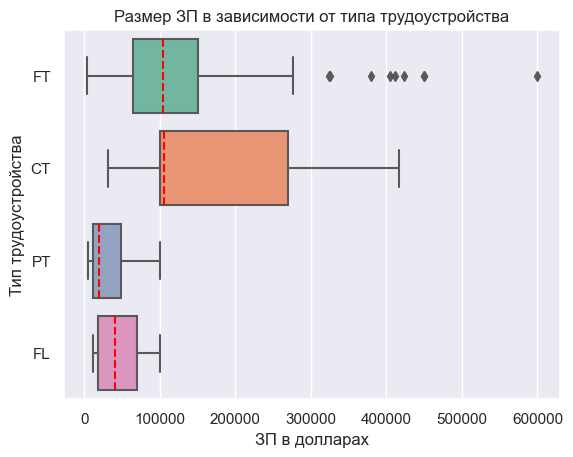

In [147]:
# посторою график зп в зависимости от типа трудоустройства

employment = sns.boxplot(salaries, x='salary_in_usd', y='employment_type', orient='h', medianprops={"color": "red", "linestyle": '--'})
employment.set(xlabel='ЗП в долларах', ylabel='Тип трудоустройства')
plt.title('Размер ЗП в зависимости от типа трудоустройства')
plt.show()

In [148]:
# отображаю основные статистические характеристики данных о зарплате

salary_exp = salaries.groupby('employment_type')['salary_in_usd'].describe().round(2)
print('Заработная плата в зависимости от типа трудоустройста')
salary_exp

Заработная плата в зависимости от типа трудоустройста


,count,mean,std,min,25%,50%,75%,max
employment_type,,,,,,,,
CT,5.0,184575.00,156250.89,31875.0,100000.00,105000.0,270000.0,416000.0
FL,4.0,48000.00,40529.82,12000.0,18000.00,40000.0,70000.0,100000.0
FT,588.0,113468.07,69476.47,2859.0,64962.25,104196.5,150000.0,600000.0
PT,10.0,33070.50,31472.91,5409.0,12000.00,18817.5,48370.0,100000.0


При визуальном анализе можно сделать первичные выводы, что зарплаты для разных типов трудоустройства - разные. Проведу тесты.


**Сформулирую нулевую и альтернативные гипотезы**

Проверю равны ли зарплаты:

*Нулевая гипотеза* ($H_0$): зарплата для разных типов трудоустройства одинаковые.

$$ H_0 : μ_1 = μ_2 = μ_3 = μ_4$$

*Альтернативная гипотеза* ($H_1$):зарплата для разных типов трудоустройства отличаются.

$$ H_1 : μ_1   \neq   μ_2\neq   μ_3\neq   μ_4$$

In [150]:
# проверяю распределение в группах

sl_CT = salaries[salaries['employment_type']=='CT']['salary_in_usd']
sl_FL = salaries[salaries['employment_type']=='FL']['salary_in_usd']
sl_FT = salaries[salaries['employment_type']=='FT']['salary_in_usd']
sl_PT = salaries[salaries['employment_type']=='PT']['salary_in_usd']

# проводим тест Шапиро-Уилка
print('CT:')
result = stats.shapiro(sl_CT)
decision_normality(result[1])

print('FL:')
result = stats.shapiro(sl_FL)
decision_normality(result[1])

print('FT:')
result = stats.shapiro(sl_FT)
decision_normality(result[1])

print('PT:')
result = stats.shapiro(sl_PT)
decision_normality(result[1])

CT:
p-value = 0.406
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
FL:
p-value = 0.507
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
FT:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
PT:
p-value = 0.023
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


**Выберу подходящий статистический тест**

Для выбора нужного теста воспользуюсь алгоритмом выбора теста. Для этого отвечу на следующие вопросы:
* Какой тип у признака «salary_in_usd»? — Количественный.
* Сколько сравниваемых групп? — Три.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет (две группы показали отличное от нормального распределение). 

Для проверки моей гипотезы можно использовать критерий Краскела — Уоллиса.

**Проведу тест**

In [151]:
# провожу тест
_, p = stats.kruskal(sl_CT, sl_FL, sl_FT, sl_PT)
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


На основании статистических тестов можно сделать вывод, что заработные платы специалистов с разным типом трудоустройства отличаются.

## Общие выводы по проекту:

1) Заработная плата DS не показывает ежегодную динамику. Но при этом рост 22 года к 23му - очевиден.

2) Нет оснований утверждать, что есть разница между зарплатами DS и DE в 2022 году.

3) Заработные платы различны в зависимости от размера компании. При этом можно утверждать, что зарплаты в компаниях M выше, чем в компаниях L. 

    Зарплаты же в компаниях M и L - статистически не отличаются. Поэтому сказать, что от размера компании доход увеличивается, в целом, нельзя.

4) Есть статистически значимая взаимосвязь между наличием должностей Data Scientist и Data Engineer и размером компании.

5) При увеличении опыта работы специалиста - увеличивается и его заработная плата.

6) Тип трудоустройства влияет на уровень заработной платы специалистов.